#### Importing Libs

In [1]:
import pandas as pd
from decouple import config
from core.utils import UtilsEDA

#### Load Var Envs

In [2]:
RAW_DATA = config("RAW_DATA")
PROCESSED_DATA = config("PROCESSED_DATA")

#### Load data

In [3]:
df_name = pd.read_csv(RAW_DATA+"CBO/ocupacao.csv", encoding="latin-1", sep=';')
df_tmp_knowledge = pd.read_excel(RAW_DATA+"QBQ/QBQ.xlsx", sheet_name="Conhecimento I")
df_tmp_knowledge_ = pd.read_excel(RAW_DATA+"QBQ/QBQ.xlsx", sheet_name="Conhecimento II")

#### Processing Data

In [4]:
# Drop columns with load error
df_tmp_knowledge_.drop(columns=["codConhecimento.1", "desConhecimento.1"], inplace=True)
# Concat dataframes in a unique
df_tmp_knowledge = pd.concat([df_tmp_knowledge, df_tmp_knowledge_], axis=0)
# Create dataframe with data that we use
df_knowledge = df_tmp_knowledge[["CodCBO", "desArea", "desCampo", "desConhecimento", "Profundidade", "Frequencia", "Importancia"]]
# Rename columns 'df_knowledge'
df_knowledge.columns = ["codCBO", "area", "field", "knowledge", "proof", "frequency", "importance"]
# Merge data
df_knowledge = df_knowledge.merge(df_name, how='left', left_on="codCBO", right_on="CODIGO").rename(columns={"TITULO":"role"})
# Drop columns that we not use
df_knowledge.drop(columns='CODIGO', inplace=True)

In [5]:
print(f"Quantidade de áreas do conhecimento: {len(df_knowledge['area'].unique())}")
print()
print(f"Quantidade de campos do conhecimento: {len(df_knowledge['field'].unique())}")

Quantidade de áreas do conhecimento: 25

Quantidade de campos do conhecimento: 275


In [6]:
df_knowledge

,codCBO,area,field,knowledge,proof,frequency,importance,role
0,202115,CIÊNCIAS EXATAS E INFORMÁTICA,CIÊNCIA DA COMPUTAÇÃO,LINGUAGEM DE PROGRAMAÇÃO,4,4.0,4,Tecnólogo em mecatrônica
1,202115,CIÊNCIAS EXATAS E INFORMÁTICA,CIÊNCIA DA COMPUTAÇÃO,OUTROS CONHECIMENTOS DE CIÊNCIA DA COMPUTAÇÃO ...,4,4.0,4,Tecnólogo em mecatrônica
2,202115,CIÊNCIAS EXATAS E INFORMÁTICA,CIÊNCIA DA COMPUTAÇÃO,OUTROS CONHECIMENTOS DE CIÊNCIA DA COMPUTAÇÃO ...,4,4.0,4,Tecnólogo em mecatrônica
3,202115,CIÊNCIAS EXATAS E INFORMÁTICA,TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO,INFORMÁTICA,4,4.0,4,Tecnólogo em mecatrônica
4,202115,CIÊNCIAS EXATAS E INFORMÁTICA,TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO,INTERNET,4,4.0,4,Tecnólogo em mecatrônica
...,...,...,...,...,...,...,...,...
113765,262820,TECNOLOGIAS ESTRATÉGICAS,TECNOLOGIAS ESTRATÉGICAS,OUTROS ELEMENTOS DO CAMPO TECNOLOGIAS ESTRATÉG...,3,NaN,4,Dramaturgo de dança
113766,262820,TECNOLOGIAS ESTRATÉGICAS,MÉTODOS E PROCEDIMENTOS CIENTÍFICOS,OUTROS ELEMENTOS (MÉTODOS E PROCEDIMENTOS DE P...,4,NaN,5,Dramaturgo de dança
113767,262820,TECNOLOGIAS ESTRATÉGICAS,MÉTODOS E PROCEDIMENTOS CIENTÍFICOS,OUTROS ELEMENTOS (MÉTODOS E PROCEDIMENTOS DE P...,4,NaN,4,Dramaturgo de dança
113768,262820,TECNOLOGIAS ESTRATÉGICAS,MÉTODOS E PROCEDIMENTOS CIENTÍFICOS,OUTROS ELEMENTOS (MÉTODOS E PROCEDIMENTOS DE P...,5,NaN,5,Dramaturgo de dança


#### Processing data to dashboard

In [7]:
datadict = UtilsEDA.create_datadict(dataframe=df_knowledge, group_by="field", return_data="proof")
# Create dataframe to dashboard
data_dash = UtilsEDA.create_dataframe_to_dashboard(datadict=datadict, result_column_name="depth")

#### Testing method to plot

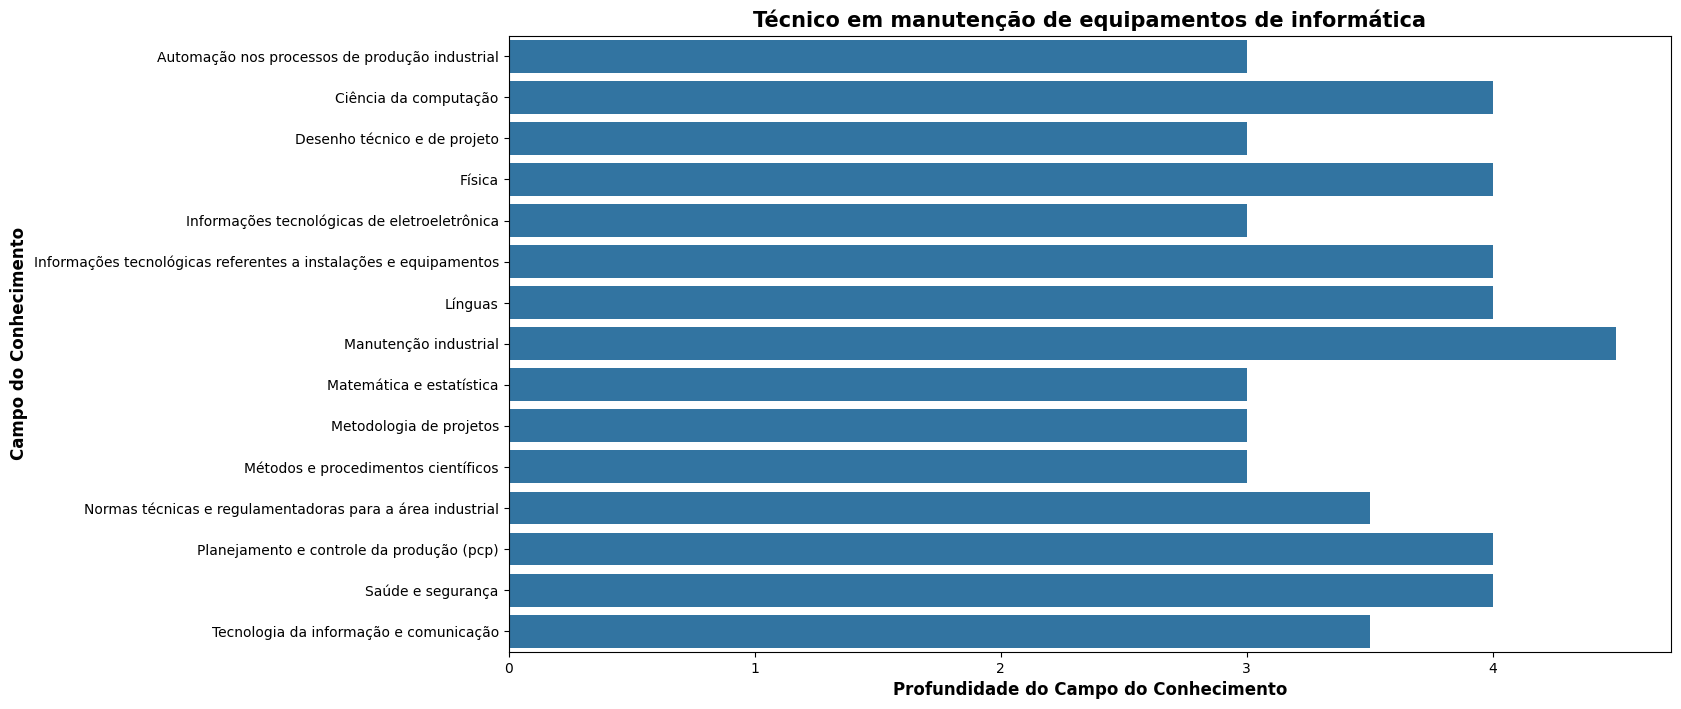

In [8]:
UtilsEDA.plotting_graph(dataframe=data_dash, column_factor="depth", code=313220, title_graph="Profundidade")

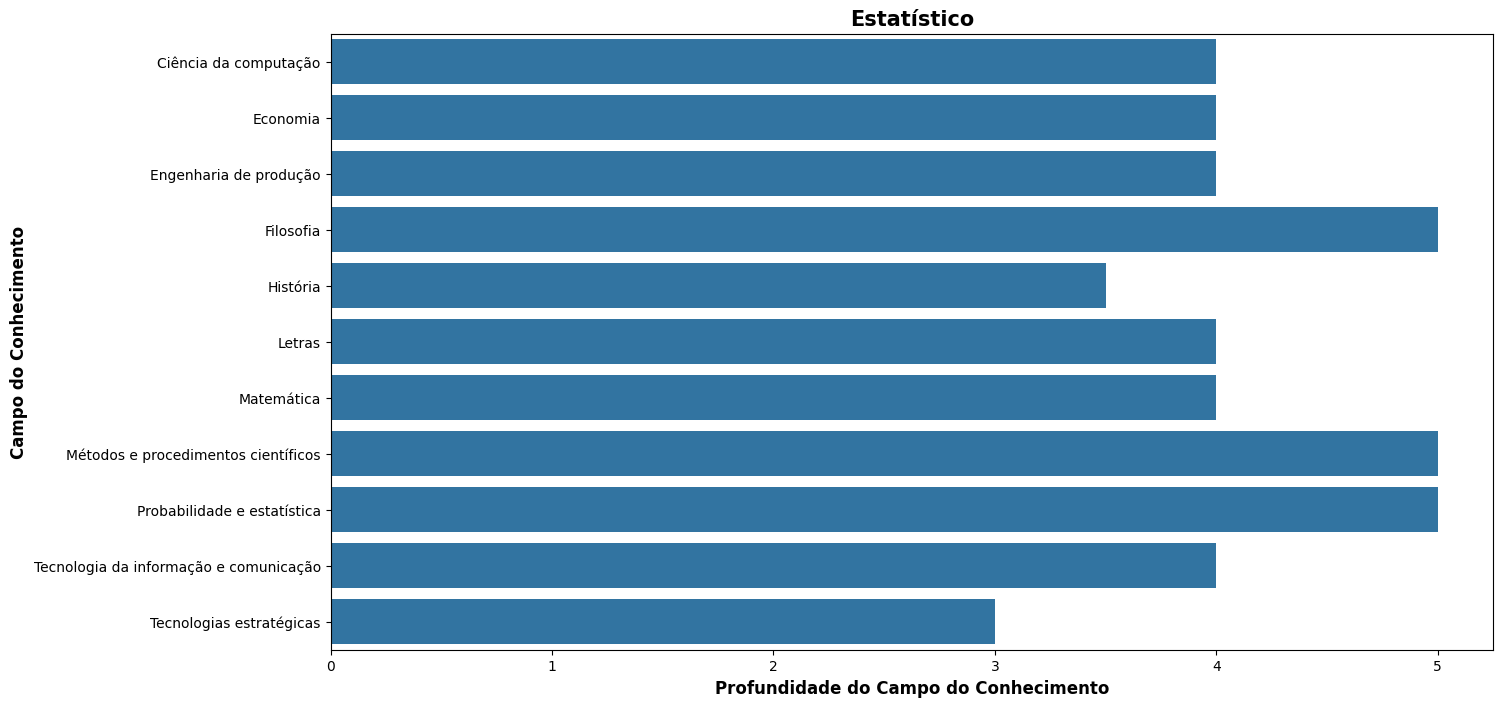

In [9]:
UtilsEDA.plotting_graph(dataframe=data_dash, column_factor="depth", code=211205, title_graph="Profundidade")

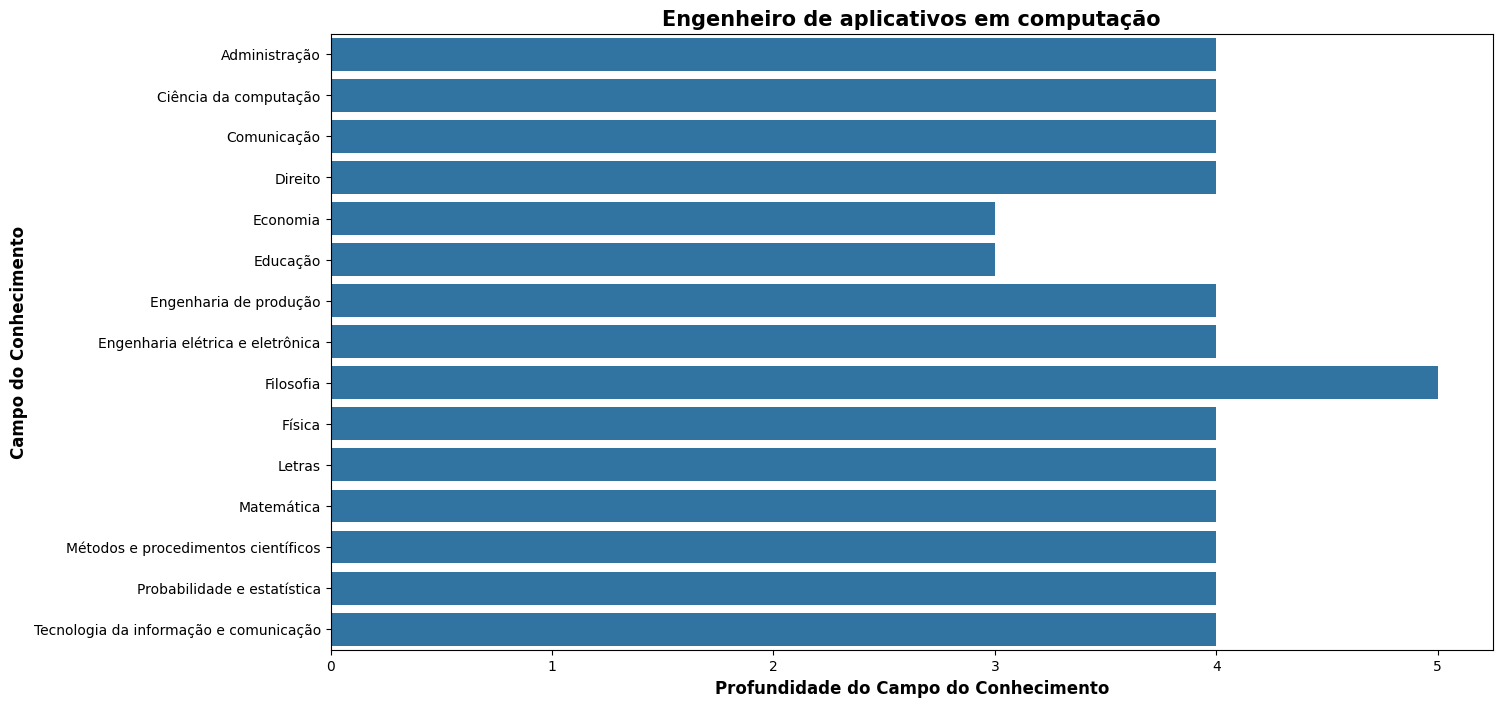

In [10]:
UtilsEDA.plotting_graph(dataframe=data_dash, column_factor="depth", code=212205, title_graph="Profundidade")

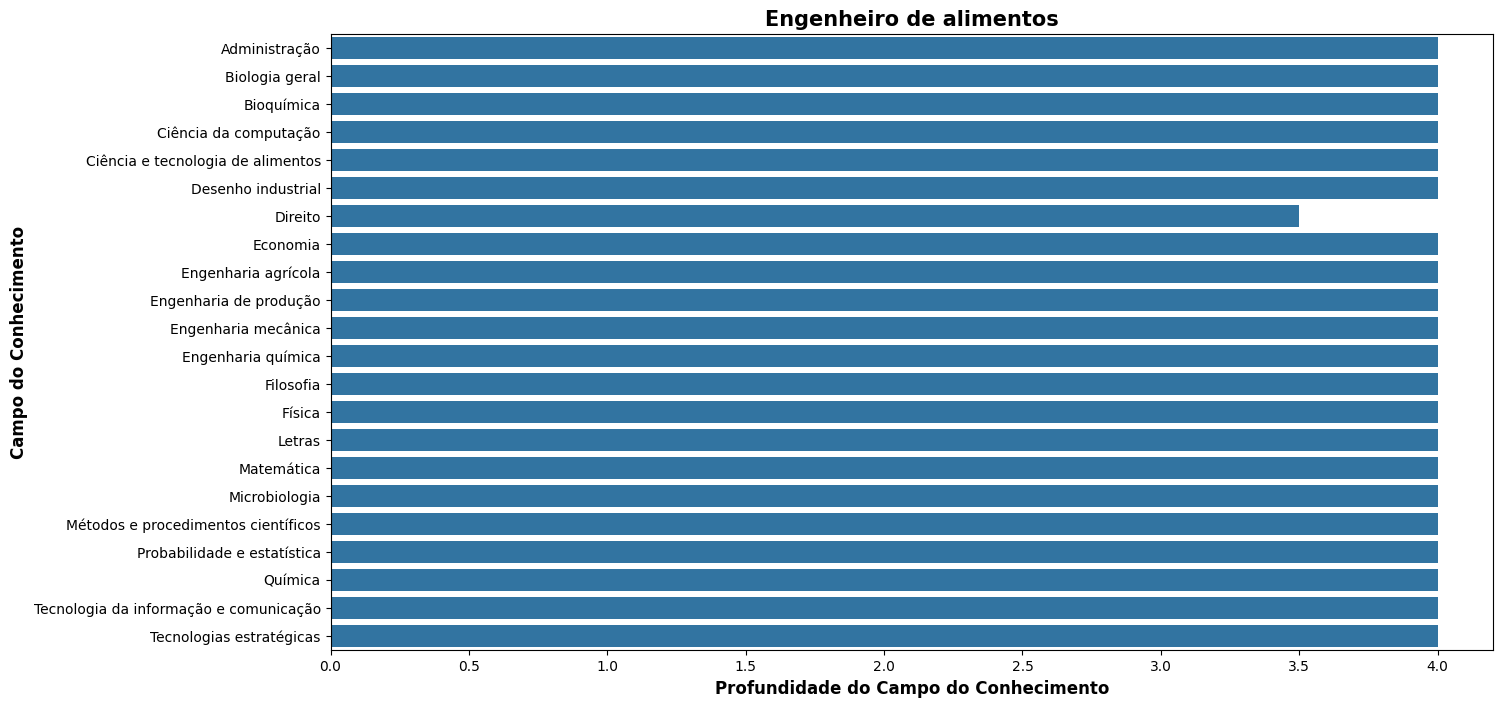

In [11]:
UtilsEDA.plotting_graph(dataframe=data_dash, column_factor="depth", code=222205, title_graph="Profundidade")